<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [50]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sb

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [54]:
df = pd.read_csv("../data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [56]:
df = df.dropna()

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Reading for 4th Grade

**(hit `Enter` to edit)**

Outcome Score in the questions refers to the outcome variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [57]:
df["YEAR"].unique()

array([2003, 2005, 2007, 2009, 2011, 2013, 2015])

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [58]:
states = df.groupby("STATE")
michMean = df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].mean()
ohioMean = df[df["STATE"] == "OHIO"]["AVG_READING_4_SCORE"].mean()
print ("Michigan: ", michMean)
print ("Ohio: ", ohioMean)
#states["AVG_READING_4_SCORE"].mean()


Michigan:  218.14285714285714
Ohio:  224.14285714285714


Find the average for your outcome score across all states in 2019

In [59]:
df["AVG_READING_4_SCORE"].mean()

219.94366197183098

Find the maximum outcome score for every state. Hint: there's a function that allows you to do this easily

In [60]:
states["AVG_READING_4_SCORE"].max()

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 215.0
ARKANSAS                219.0
CALIFORNIA              213.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    212.0
FLORIDA                 227.0
GEORGIA                 222.0
HAWAII                  215.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   226.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             214.0
MISSOURI                224.0
MONTANA                 227.0
NEBRASKA                227.0
NEVADA                  214.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              231.0
NEW_MEXICO              212.0
NEW_YORK                224.0
NORT

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (chosen outcome variable). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [61]:
df["INSTRUCTION_EXPENDITURE_PER_STUDENT"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]
#instructExpenditure_per_student
df["LOCAL_REVENUE_PER_STUDENT"] = df["LOCAL_REVENUE"] / df["GRADES_ALL_G"]

Final feature list: Instructional expenditure per student, state revenue per student

Feature selection justification: I think that looking at the instructional expenditure per student and the state revenue per student would help individuals understand how the amount of available money and resources affect student academic proficiency.

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen outcome variable with any features you chose

**Visualization 1**

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='AVG_READING_4_SCORE'>

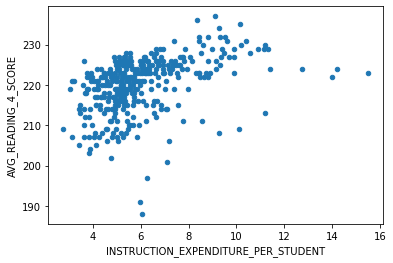

In [62]:
import matplotlib.pyplot as plt
df.plot.scatter(x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y="AVG_READING_4_SCORE")


Scatterplot showing the relationship between the instructional expenditure per student and the average 4th grade reading score.

**Visualization 2**

<AxesSubplot:xlabel='INSTRUCTION_EXPENDITURE_PER_STUDENT', ylabel='LOCAL_REVENUE_PER_STUDENT'>

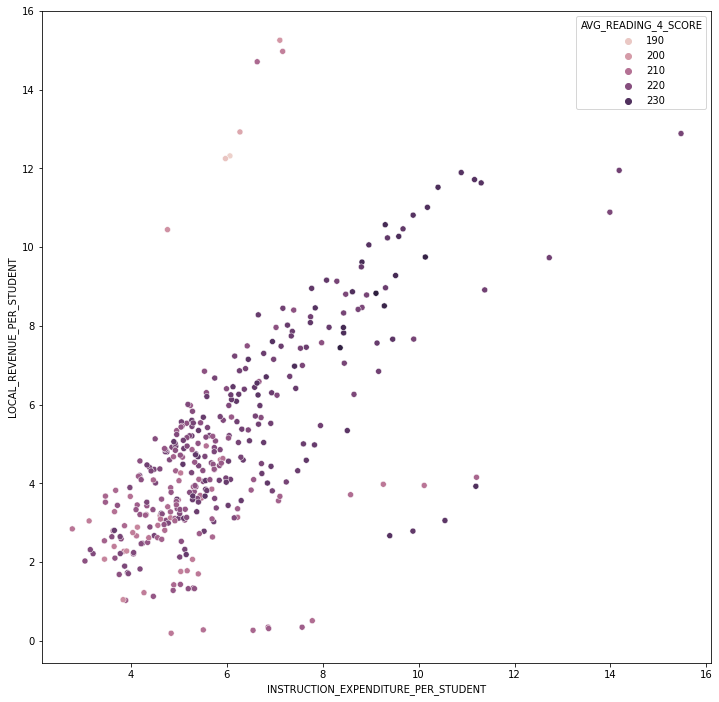

In [63]:
plt.figure(figsize=(12,12))
sb.scatterplot(data=df, x="INSTRUCTION_EXPENDITURE_PER_STUDENT", y = "LOCAL_REVENUE_PER_STUDENT", hue="AVG_READING_4_SCORE")


This is a scatterplot with three variables: the instructional expenditure per student, the local revenue per student, and the average 4th grade reading score. The average 4th grade reading score is color coded with a key in the top left corner.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT', 'LOCAL_REVENUE_PER_STUDENT']]
y = df['AVG_READING_4_SCORE']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

print(X_test)

      INSTRUCTION_EXPENDITURE_PER_STUDENT  LOCAL_REVENUE_PER_STUDENT
567                              6.447413                   7.149978
803                              6.656389                   8.279643
1117                             6.630225                   6.546516
985                              5.841918                   4.076448
702                              6.671116                   6.584167
...                                   ...                        ...
990                              9.110737                   8.827703
1215                             5.336681                   3.942873
766                              7.077113                   3.556381
809                              3.152234                   2.315469
905                              7.169021                   8.446832

[107 rows x 2 columns]


<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: Classification

In [67]:
# import your sklearn class here
y = df.loc[X.index]['AVG_READING_4_SCORE']>220
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)
from sklearn.neighbors import KNeighborsClassifier

In [68]:
# create your model here
model = KNeighborsClassifier(n_neighbors=3)

In [69]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [70]:
y_pred = model.predict(X_test)

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


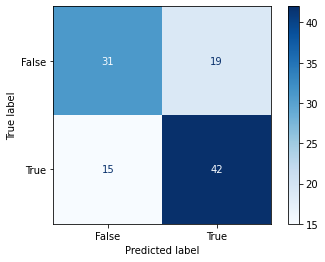

In [71]:
# FOR CLASSIFICATION ONLY:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [ ]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**